In [29]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42) 
path = Path("plots/")
path.mkdir(exist_ok=True)

In [28]:
x_inf = 1
x_0 = 0
a = 0.5
b = 0.5

def simulate_ou(T, size, dt, x_0, x_inf, a, b):
    n_intervals = int(T/dt)
    x= np.zeros((size, n_intervals))
    x[:,0] = x_0
    for i in range(1, n_intervals):
        t = i*dt
        dw = np.random.normal(0, np.sqrt(dt), size)
        x[:,i] = x[:,i-1] - a* np.exp(-a*t)*(x_0-x_inf)*dt + b * dw
    return x

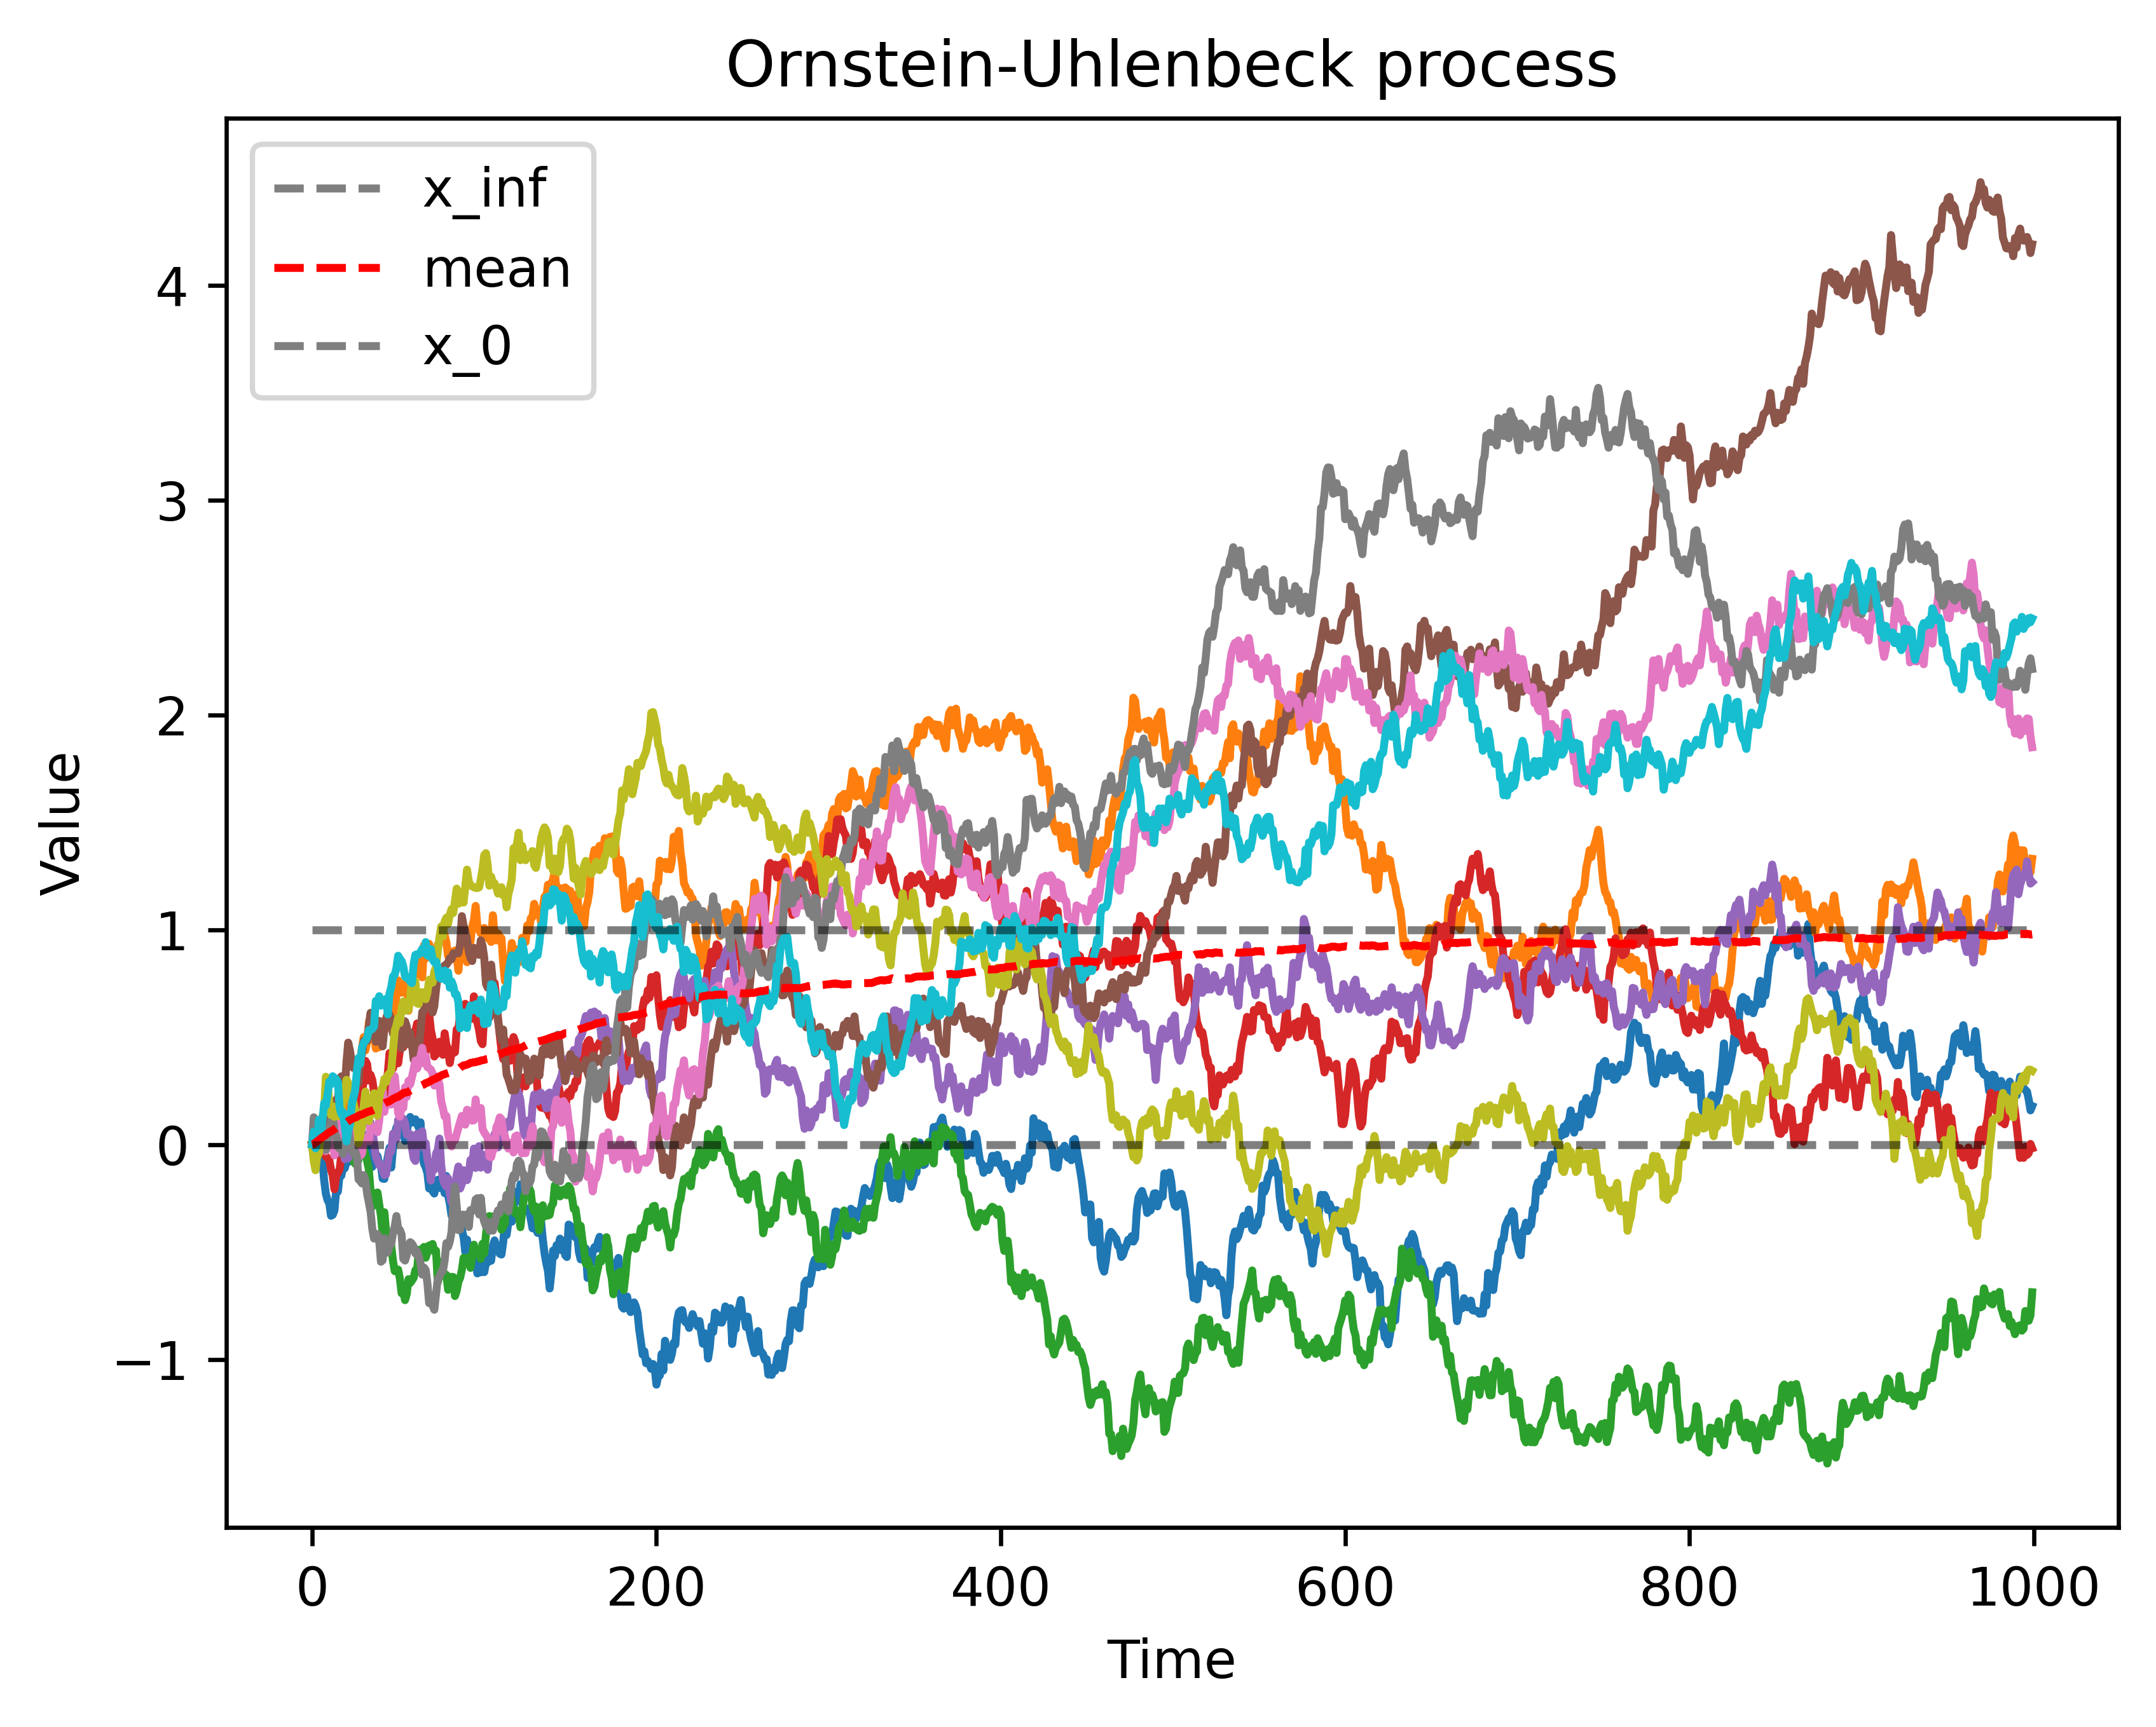

In [31]:
T = 10
size = 1000
dt = 0.01
x = simulate_ou(T, size, dt, x_0, x_inf, a, b)

plt.figure(dpi=600)
plt.plot(x.T[:,:10])
# plot the line x_inf
plt.plot(np.ones(x.shape[1])*x_inf, 'k--', alpha=0.5, label='x_inf')
# plot the mean of the process
plt.plot(np.mean(x, axis=0), 'r--', label='mean')
# plot x_0
plt.plot(np.ones(x.shape[1])*x_0, 'k--', alpha=0.5, label='x_0')
plt.legend()
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel('Time')
plt.ylabel('Value')
# plt.savefig(path / 'ou_process.png')

In [22]:
def cov(x,y):
    return np.mean(x*y) - np.mean(x)*np.mean(y)

(1000, 10000)

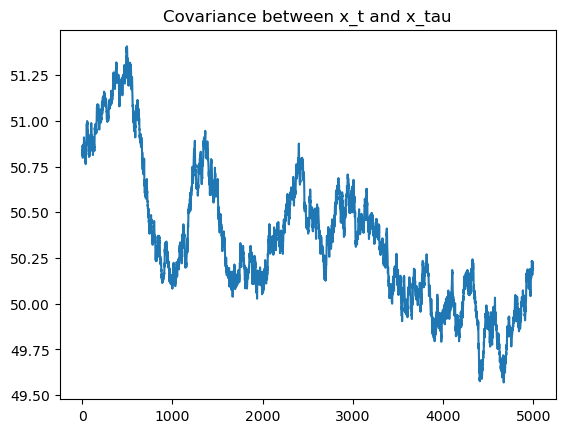

In [48]:
T_size = x.shape[1]
t = T_size//2

x_inf = 1
x_0 = 0
a = 1
b = 1
T = 100
x = simulate_ou(T, size, dt, x_0, x_inf, a, b)

x_t = x[:, t]
covariance = []
for i in range(t+1, T_size):
    x_tau = x[:,i]
    covariance.append(np.cov(x_t, x_tau)[0,1])
    # covariance.append(cov(x_t, x_tau))
    
plt.plot(covariance, label='Covariance')
plt.title('Covariance between x_t and x_tau')
# plt.plot(np.ones(x.shape[1])*(b**2/(2*a)), 'k--', alpha=0.5, label='x_0')
# plt.plot(x.T[:,:10])
x.shape

In [32]:
x.shape

(1000, 1000)